/home/rai/.local/lib/python3.10/site-packages/gradio/inputs.py:347: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/rai/.local/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/rai/.local/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `keep_filename` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/rai/.local/lib/python3.10/site-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/rai/.local/lib/python3.10/site-packages/gradio/inputs.py:121: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.compon

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


<Figure size 640x480 with 0 Axes>

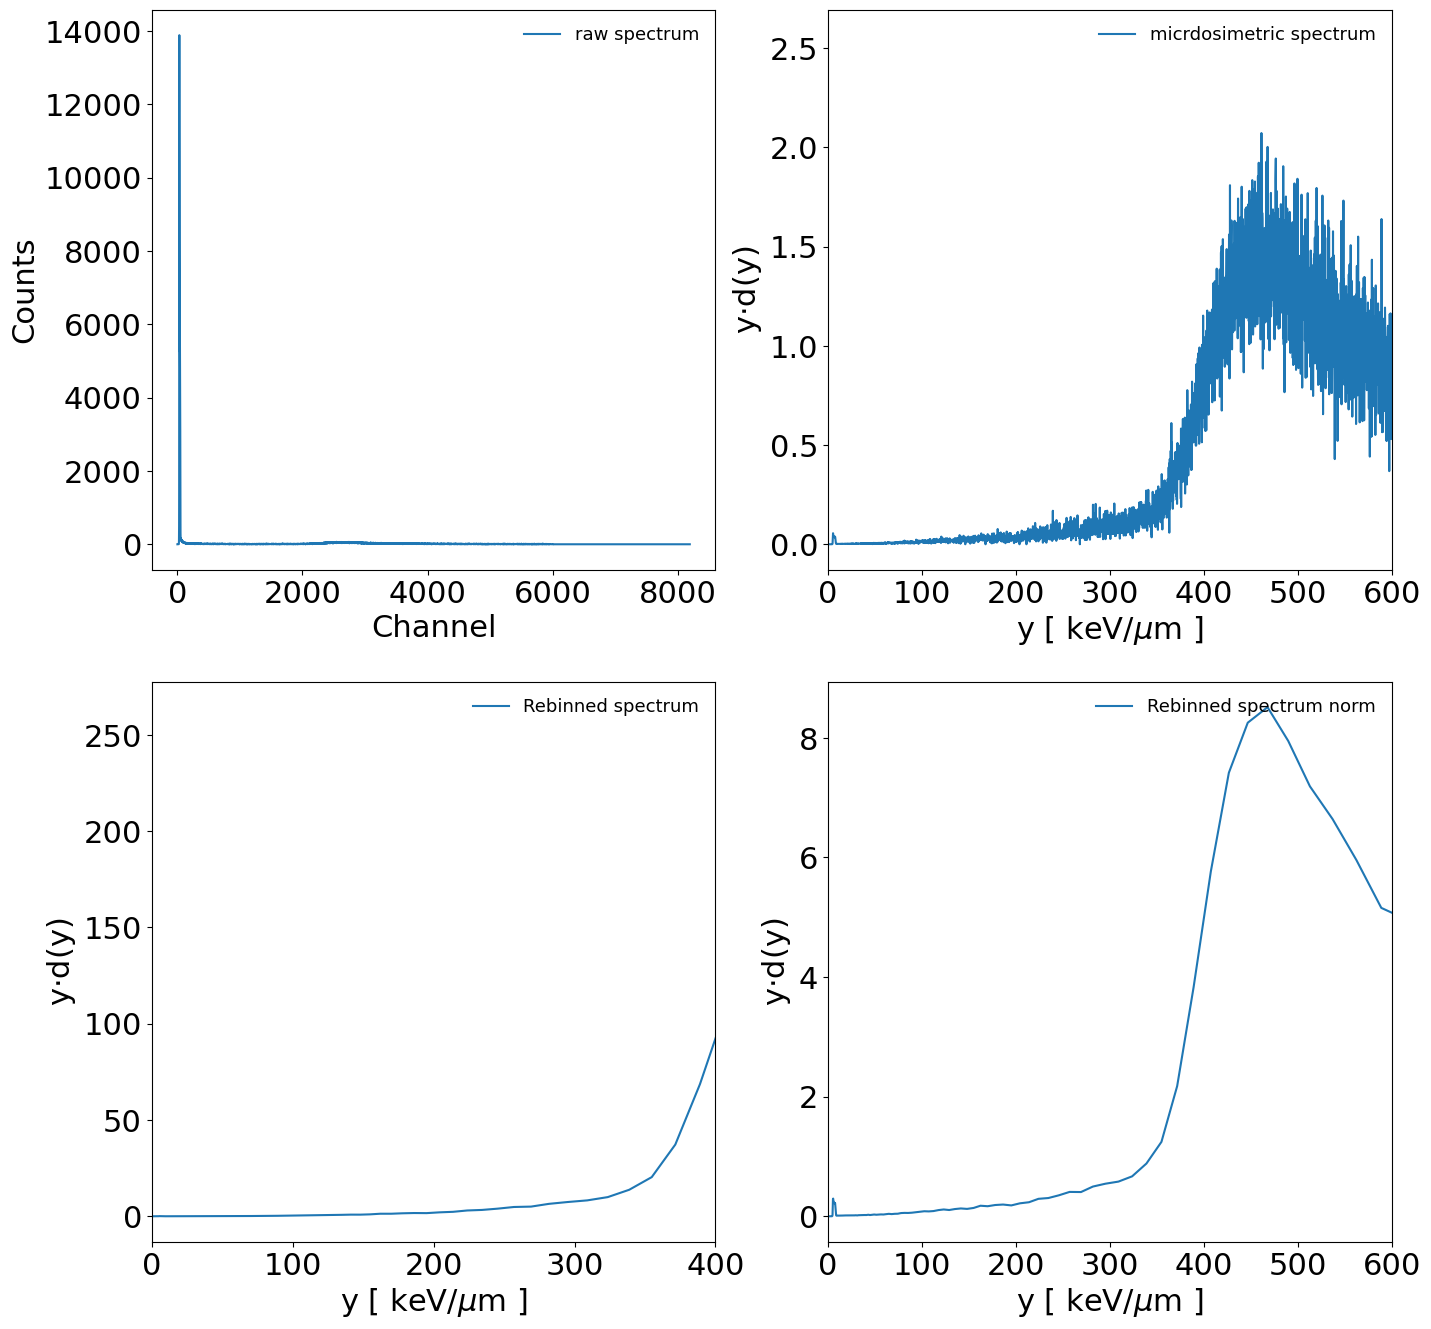

8192
8192
8192
8192


In [3]:
import gradio as gr
from gradio import *
import pandas as pd

import numpy

from math import *
import csv

import numpy as np
import matplotlib.pyplot as plt

# Libraies for error propagation
#
from uncertainties import ufloat
from uncertainties.umath import *
import uncertainties.unumpy as unumpy

import os
#import cv2
from pathlib import Path
import os

if os.path.exists("spectra.csv"):
    os.remove("spectra.csv")


if os.path.exists("spectra_rebin.csv"):
    os.remove("spectra_rebin.csv")


plt.rcParams.update({'font.size': 22})

def process_file(file, a, b, mean_chord, max_channels, Si):


    plt.clf()
    # read text file and perform processing
    with open(file.name, 'r') as f:
       
        fileSpectraFromMCA = f  #this is mean linear energy what we measure from MCA
        lines_fileSpectraFromMCA = fileSpectraFromMCA.readlines()
        del lines_fileSpectraFromMCA[8204:8219]
        del lines_fileSpectraFromMCA[0:12]
        fileSpectraFromMCA.close()
        print (len(lines_fileSpectraFromMCA))
        
        countsFromFileSpectraFromMCA = []
        
        # Loop on all the file lines and slit all the columns
        #
        for line in lines_fileSpectraFromMCA:
            p = line.split()
        # finally vectors are created
            countsFromFileSpectraFromMCA.append(float(p[0]))
        
        # Created vectors are transformed in Numpy vectors
        #
        # energyBinFromFileSpectraFromMCA = np.array(energyBinFromFileSpectraFromMCA)
        countsFromFileSpectraFromMCA = np.array(countsFromFileSpectraFromMCA)
        
        # The energy bin must be constructed starting from the channel number and applying the proper
        # calibration
        #
        # In this case the used calibration is:
        #
        # x is the channel
        # E is the energy bin [ keV ]
        #
        # E = p1*x + p2
        # p1 = 2.907(2.907, 2.907)
        # p2 = -0.05026(-0.1993, 0.09875)
        #
        maximumChannel = 8191
        channelFromFileSpectraFromMCA = np.linspace(0, maximumChannel, maximumChannel+1)
        
        # Applying the calibration
        #
        # Calibration factors with the errors calculated from the fit
        #
        p1 = a #a  # Error on p1 is very small and it is assumed zero
        p2 = b #b
        
        # Conversion of the channel in an energy bin
        #
        energyBinFromFileSpectraFromMCA = (channelFromFileSpectraFromMCA*p1 + p2)
        
        # The errors on counts N can be the sqrt(N) of the counts in each bin
        #
        countsFromFileSpectraFromMCA = countsFromFileSpectraFromMCA
        
        # Value of the mean chord
        #
        meanChordExperimental = mean_chord
        meanChordExperimental = meanChordExperimental
        
        # Create a vector dividing each energy bin by the mean chord
        #
        if Si:
            y_Exp = energyBinFromFileSpectraFromMCA/meanChordExperimental*2.85 #multiply by 2.85 for Si
        else:
            y_Exp = energyBinFromFileSpectraFromMCA/meanChordExperimental
        # Let define Fy the counts or frequencies
        #
        Fy_Exp = countsFromFileSpectraFromMCA
        
        # Calculate the integral of (y_Exp,Fy_Exp)
        #
        integral_y_Fy_Exp = np.trapz(Fy_Exp,y_Exp)
        
        # Normalisation of Fy as respect the integral
        #
        Fy_normalised_Exp = Fy_Exp/integral_y_Fy_Exp
        
        # ***** Calculation of yF
        #
        yF_Exp = np.trapz(y_Exp*Fy_normalised_Exp, y_Exp)
        
        # ***** Calculation of yD
        #
        # Firstly, we must calculate the dose distribution d(y)
        #
        dy_Exp = (y_Exp*Fy_normalised_Exp)/yF_Exp
        
        yD_Exp = np.trapz(y_Exp*dy_Exp,y_Exp)
        
        # Extraction of the medium value and corresponding standard deviation  of
        # the various quantities we have calculated
        #CALCULATE THE ERROR OF THE MEAN OF YD AND YF



        #
        # Extraction of the energy vector
        #
        energyBinFromFileSpectraFromMCA = energyBinFromFileSpectraFromMCA

        # Calculation of the error on the mean of yF

                #
        y_Value_Exp = y_Exp
        
        Fy_Value_Exp = Fy_Exp
        
        Fy_normalised_Value_Exp = Fy_normalised_Exp
        
        yF_Value_Exp = yF_Exp
        
        
        
        # calculation of yd(y)
        #
        y_dy_Exp = y_Exp*y_Exp*Fy_normalised_Exp/yF_Value_Exp
        # Extraction of Value and Standard deviation of yd(y)
        #
        y_dy_Value_Exp = y_dy_Exp
        
#        f = open(datadir/'yfyd.txt', "a")
#        print("yf=", yF_Exp,"yd=",yD_Exp,file=f)
#        f.close() 
#        
        
        prova = np.column_stack((y_Value_Exp, y_dy_Value_Exp))
        
        np.savetxt('spectra.csv', prova)

#here we proceed with rebinning of the data in spectra file

        
        def test (a,b,c,d):
            res = 0
            for i in range (0,a+1):
                if (d[i] >= b and d[i]<= c):
                    res = res +1
            return res    

        def test_s(a,b,c):
            res = 0
    
            for i in range(0,a):
                if c[i] <= b:
                    res = res +1   
                 
            return res-1
        

        
        index = 0
        Bdec = 50 # number of bin per decade
        Ndec = 3 # numeber of decade
        N_BINS_LOG = Bdec * Ndec # Total number of bins in the log scale
        integral_lin = 0 
        integral_log = 0 
        integral_log_rebin = 0 # SF
        y0 = 1 # inital bin for the log scale rebinning
        #NUMEL = 8189 # file Giada
        NUMEL = 8192 # file Pablo
        #NUMEL = 381 # file MITRA
        #NUM_ESTREMI = NUMEL+1 # numero di estremi del binnaggio lineare  #this is not used in the code
        x=[] #y 
        c_lin=[] #ydy
        dx_lin=[] # vectors where I store the contents of the initial file (x = y and  c_lin = ydy)
        ticks_lin=[] # vector that will contain the ends of the linear bins
        x_rebin=[]
        dx_log=[] #vector that will contain the logarithmic bins (central value of each bin)
        ticks_log=[]
        c_log=[]
        c_log_normwidth=[] # vectors that will contain the extremes of the logarithmic bins, the counts of the logarithmic bins, and the normalized counts
        
        
        
        ff = open('spectra.csv', 'r')
        lines_ff = ff.readlines()
        ff.close()
        
        for line in lines_ff:
            p = line.split(" ")
        # finally vectors are created
            x.append(float(p[0]))  #y
            c_lin.append(float(p[1])) #ydy

            #so we have y and ydy from spectra file we developed in the previous step
        
        for i in range (1,len(x)):
            dummy = x[i] - x[i-1]
            dx_lin.append(dummy)
#this was to find difference between two consecutive values of y

        for i in range (0,len(dx_lin)):
            integral_lin += (c_lin[i]/dx_lin[i]) *dx_lin[i]  #
#then we calculated integral that is actually sum of all areas of the trapzoids     

# Normalize counts in logarithmic bins Rajka
        #for i in range(0, N_BINS_LOG):
        #    c_log[i] /= dx_log[i]
        #    c_log_normwidth.append(c_log[i])
        #    integral_log +=  c_log[i]  * dx_log[i]
        #    integral_log_rebin += c_log_normwidth[i] * dx_log[i]

        lin_step = x[1]-x[0]
        #if (x[0]<y0) :
        #    print ("problem: the smallest linear bin is smaller than the smallest log bin!!")    
        
        dummy = x[0] - lin_step*0.5   
        ticks_lin.append(dummy)
        for i in range (0,len(x)):
            dummy = x[i] + lin_step*0.5
            ticks_lin.append(dummy)
        
        for i in range (0,N_BINS_LOG+1):
            dummy = y0*pow(10,1*i/Bdec)    
            ticks_log.append(dummy)
            
        for i in range (0,N_BINS_LOG):
            dummy1 = ticks_log[i] * sqrt(ticks_log[i + 1] / ticks_log[i])
            x_rebin.append(dummy1)
            c_log.append(0)
            dummy3 = ticks_log[i+1] - ticks_log[i]
            dx_log.append(dummy3)
        
        rtest = -1
        for i in range (0,len(x)):
            s1 = ticks_lin[i]
            s2 = ticks_lin[i+1]
            rtest = test(N_BINS_LOG,s1,s2,ticks_log)
            #print(rtest)
            id = 0
            t1 = -1
            t2 = -1
            
            if rtest == 0:
                id = test_s(N_BINS_LOG, s1, ticks_log)
                c_log[id] = c_log[id]+c_lin[i]
                #c_log[id] += c_lin[i] * (s2 - s1) / (ticks_log[id+1] - ticks_log[id])
                #Rajka


            elif rtest == 1:
                id = test_s(N_BINS_LOG, s2, ticks_log)
                c_log[id]= c_log[id] + c_lin[i]/(s2 - s1)*(s2 - ticks_log[id])
                c_log[id-1] = c_log[id-1] + c_lin[i] / (s2 - s1) * (ticks_log[id] - s1)
            elif rtest == 2:
                t1 = test_s(N_BINS_LOG, s1, ticks_log)
                t2 = test_s(N_BINS_LOG, s2, ticks_log)
                c_log[t1] = c_log[t1] + c_lin[i] / (s2 - s1) * (ticks_log[t1+1] - s1)
                c_log[t2] = c_log[t2] + c_lin[i] / (s2 - s1) * (s2 - ticks_log[t2])
                b = t1+t2
                while (b<t2):
                    c_log[b] = c_log[b] + c_lin[i] / (s2 - s1)*dx_log[b]
                    b = b+1
        
        for i in range (0, N_BINS_LOG):
            dummy = (c_log[i] / dx_log[i])
            c_log_normwidth.append(dummy)
            integral_log +=  c_log[i]  * dx_log[i]
            integral_log_rebin += c_log_normwidth[i] * dx_log[i]
            


            fff = open('spectra_rebin.csv', "a")
            print(x_rebin[i],c_log[i],dx_log[i],c_log_normwidth[i],file=fff) 
            fff.close()

            
        figure20 = plt.figure(20, figsize=(16, 16))
        plt.subplot(2,2,3)
        plt.plot(x_rebin, c_log,
                     marker="", fillstyle='none',
                     linestyle='solid',
                     markeredgecolor='darkgreen', markersize=2,
                     markeredgewidth=1, markerfacecolor='none',
                     #ecolor='springgreen', capsize=2, elinewidth=0.5,
                     label='Rebinned spectrum')
        plt.ylabel(r'y$\cdot$d(y)')
        plt.xlabel(r'y [ keV/$\mu$m ]')
        plt.xlim(0, 1000)
        plt.legend(loc="upper right", frameon=False, fontsize=13)
        
        plt.subplot(2,2,4)
        plt.plot(x_rebin, c_log_normwidth,
                     marker="", fillstyle='none',
                     linestyle='solid',
                     markeredgecolor='darkgreen', markersize=2,
                     markeredgewidth=1, markerfacecolor='none',
                     label='Rebinned spectrum norm')
        plt.ylabel(r'y$\cdot$d(y)')
        plt.xlabel(r'y [ keV/$\mu$m ]')
        plt.xlim(0, 1000)
        #plt.title('Energy spectra without errors')
        plt.legend(loc="upper right", frameon=False, fontsize=13)    
        
        plt.subplot(2,2,2)
        
        plt.plot(y_Value_Exp, y_dy_Value_Exp,
                     marker="", fillstyle='none',
                     linestyle='solid',
                     markeredgecolor='navy', markersize=2,
                     markeredgewidth=1, markerfacecolor='none',
                     #ecolor='royalblue', capsize=2, elinewidth=0.5,
                     label='micrdosimetric spectrum')
        plt.ylabel(r'y$\cdot$d(y)')
        plt.xlabel(r'y [ keV/$\mu$m ]')
        plt.xlim(0, 1000)
        #plt.title('yd(y) spectra with errors')
        plt.legend(loc="upper right", frameon=False, fontsize=13)
        
        plt.subplot(2,2,1)
        
        plt.plot(np.linspace(1, 8192, 8192), countsFromFileSpectraFromMCA,
                     marker="", fillstyle='none',
                     linestyle='solid',
                     markeredgecolor='navy', markersize=2,
                     markeredgewidth=1, markerfacecolor='none',
                     #ecolor='royalblue', capsize=2, elinewidth=0.5,
                     label='raw spectrum')
        plt.ylabel(r'Counts')
        plt.xlabel(r'Channel')
        #plt.xlim(0, 400)
        #plt.title('yd(y) spectra with errors')
        plt.legend(loc="upper right", frameon=False, fontsize=13)
        
        plt.draw()
        plt.savefig('test.png')
        
        
        
        
        
        
    #save results to CSV file and return it
#    output_file = 'results.csv'
#    results.to_csv(output_file, index=False)
#    with open(output_file, 'r') as f:
#        csv_data = f.read()
    
    return "spectra.csv",yF_Exp,yD_Exp,"spectra_rebin.csv",'test.png'

iface = gr.Interface(
    fn=process_file,
    inputs=[
        gr.inputs.File(label='Input file'),
        gr.inputs.Number(label='Calibration a (Energy = Channel*a + b) ', default=1),
        gr.inputs.Number(label='Calibration b (Energy = Channel*a + b)', default=2),
        gr.inputs.Number(label='Mean chord', default=3),
        gr.inputs.Number(label='Maximum channels', default=8191),
        gr.inputs.Checkbox(label="Silicon detector")
    ],
    outputs=[
            gr.outputs.File(label='Results (CSV)'),
            gr.outputs.Textbox(label='yF'),
            gr.outputs.Textbox(label='yD'),
            gr.outputs.File(label='Results Rebinned (CSV)'),
            gr.outputs.Image(type="filepath",label='plots'),
            
            
    ],
    title='Microdosimetry Toolkit',
    description='Coffe making feature in development...'
)

iface.launch()